In [198]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [131]:
cars = pd.read_excel("datasets/imports-85.xlsx")
cars.head()

,SiraNo,RiskDerecesi,KayipDegeri,Uretici,YakitTuru,Enjeksiyon,KapiSayisi,GovdeTuru,Cekis,DingilAcikligi,...,MotorHacmi,YakitSistemi,SilindirCapi,Zamanlama,SikistirmaOrani,BeygirGucu,MaximumDevir,SehirIciHarcama,SehirDisiHarcama,Fiyat
0,1,2,164,audi,gas,std,four,sedan,fwd,"99,8",...,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
1,2,2,164,audi,gas,std,four,sedan,4wd,"99,4",...,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
2,3,1,158,audi,gas,std,four,sedan,fwd,"105,8",...,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,17710
3,4,1,158,audi,gas,turbo,four,sedan,fwd,"105,8",...,131,mpfi,"3,13","3,4","8,3",140,5500,17,20,23875
4,5,2,192,bmw,gas,std,two,sedan,rwd,"101,2",...,108,mpfi,"3,5","2,8","8,8",101,5800,23,29,16430


In [133]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SiraNo            159 non-null    int64 
 1   RiskDerecesi      159 non-null    int64 
 2   KayipDegeri       159 non-null    int64 
 3   Uretici           159 non-null    object
 4   YakitTuru         159 non-null    object
 5   Enjeksiyon        159 non-null    object
 6   KapiSayisi        159 non-null    object
 7   GovdeTuru         159 non-null    object
 8   Cekis             159 non-null    object
 9   DingilAcikligi    159 non-null    object
 10  Uzunluk           159 non-null    object
 11  Genislik          159 non-null    object
 12  Yukseklik         159 non-null    object
 13  AzamiAgirlik      159 non-null    int64 
 14  MotorTuru         159 non-null    object
 15  SilindirSayisi    159 non-null    object
 16  MotorHacmi        159 non-null    int64 
 17  YakitSistemi    

In [134]:
cars.isnull().any()

SiraNo              False
RiskDerecesi        False
KayipDegeri         False
Uretici             False
YakitTuru           False
Enjeksiyon          False
KapiSayisi          False
GovdeTuru           False
Cekis               False
DingilAcikligi      False
Uzunluk             False
Genislik            False
Yukseklik           False
AzamiAgirlik        False
MotorTuru           False
SilindirSayisi      False
MotorHacmi          False
YakitSistemi        False
SilindirCapi        False
Zamanlama           False
SikistirmaOrani     False
BeygirGucu          False
MaximumDevir        False
SehirIciHarcama     False
SehirDisiHarcama    False
Fiyat               False
dtype: bool

Veride herhangi bir nan değer bulunmamaktadır.

In [135]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
SiraNo,159.0,80.000000,46.043458,1.0,40.5,80.0,119.5,159.0
RiskDerecesi,159.0,0.735849,1.193086,-2.0,0.0,1.0,2.0,3.0
KayipDegeri,159.0,121.132075,35.651285,65.0,94.0,113.0,148.0,256.0
AzamiAgirlik,159.0,2461.138365,481.941321,1488.0,2065.5,2340.0,2809.5,4066.0
MotorHacmi,159.0,119.226415,30.460791,61.0,97.0,110.0,135.0,258.0
BeygirGucu,159.0,95.836478,30.718583,48.0,69.0,88.0,114.0,200.0
MaximumDevir,159.0,5113.836478,465.754864,4150.0,4800.0,5200.0,5500.0,6600.0
SehirIciHarcama,159.0,26.522013,6.097142,15.0,23.0,26.0,31.0,49.0
SehirDisiHarcama,159.0,32.081761,6.459189,18.0,28.0,32.0,37.0,54.0
Fiyat,159.0,11445.729560,5877.856195,5118.0,7372.0,9233.0,14719.5,35056.0


<AxesSubplot:xlabel='Uretici', ylabel='count'>

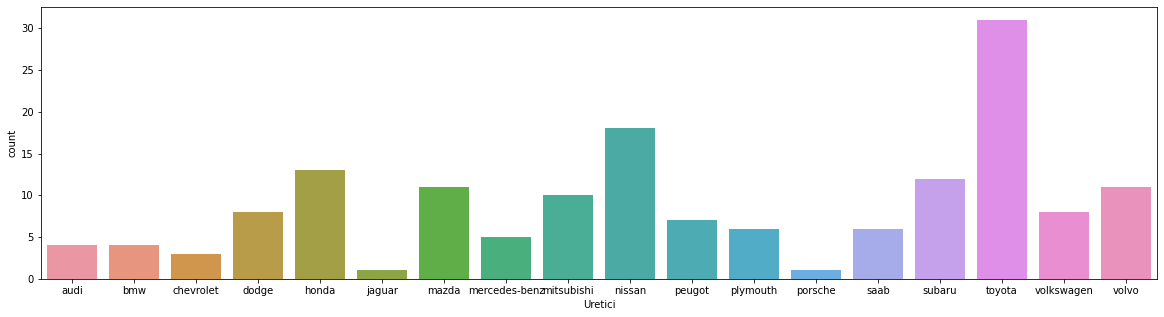

In [147]:
objects = cars.select_dtypes(include=["object"])

features= ["DingilAcikligi","Uzunluk","Genislik","Yukseklik","SilindirCapi","Zamanlama","SikistirmaOrani"]
objects=objects.drop(features,axis=1)


plt.figure(figsize=(20,5))
sns.countplot(objects["Uretici"])


In [148]:
# TOYOTA

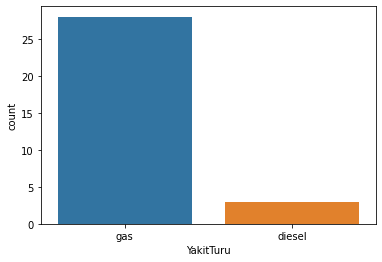

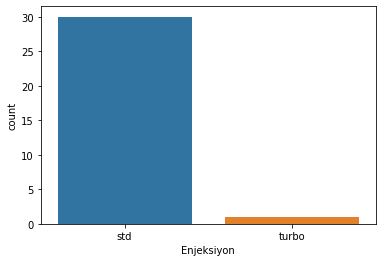

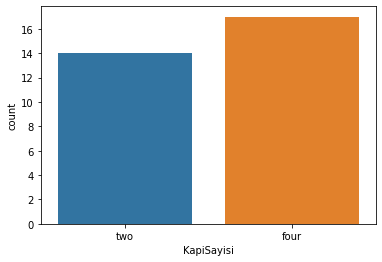

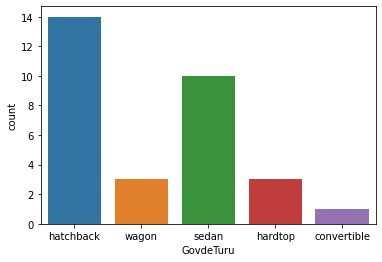

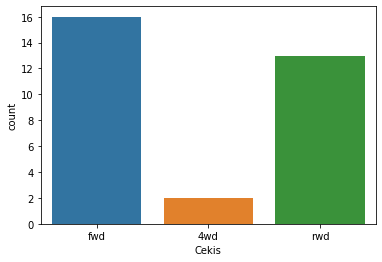

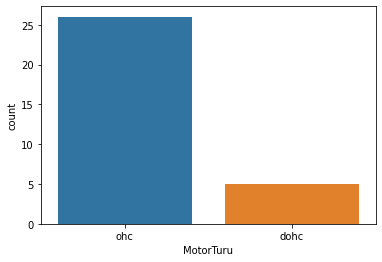

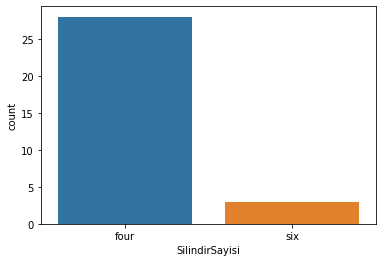

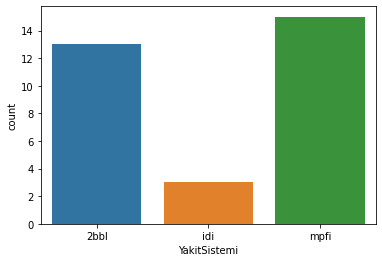

In [152]:
toyota = objects[(objects["Uretici"]=="toyota")]
cols = list(objects.columns)
del cols[0]
for i in cols:
    plt.figure(i)
    sns.countplot(toyota[i])

In [149]:
# NİSSAN

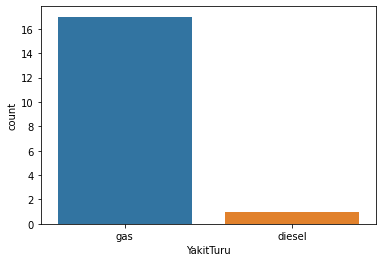

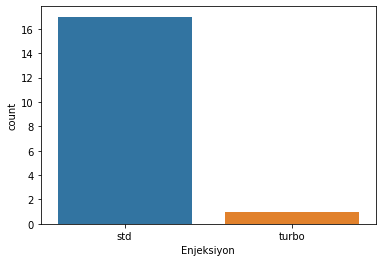

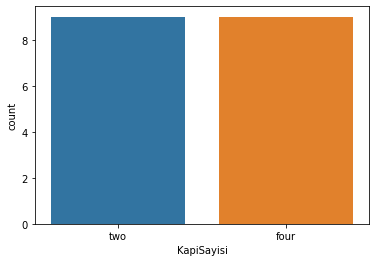

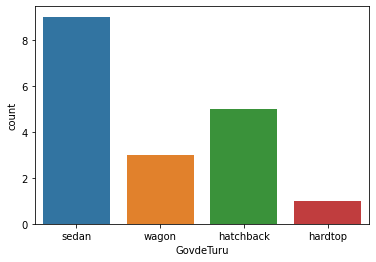

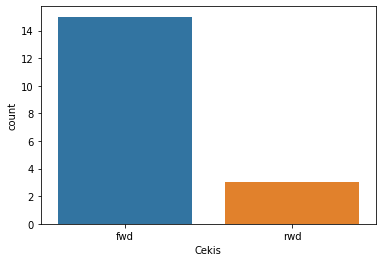

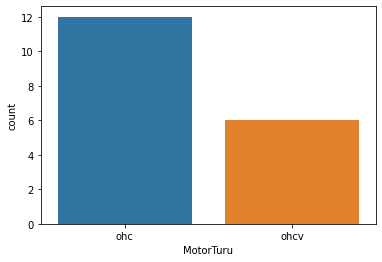

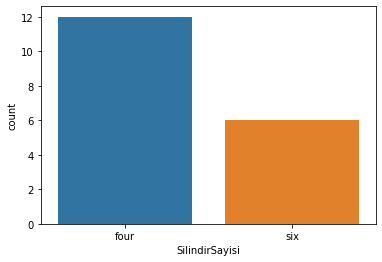

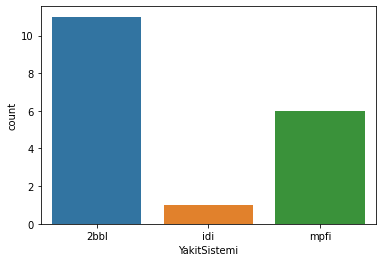

In [153]:
nissan = objects[(objects["Uretici"]=="nissan")]
cols = list(objects.columns)
del cols[0]
for i in cols:
    plt.figure(i)
    sns.countplot(nissan[i])

In [150]:
# HONDA

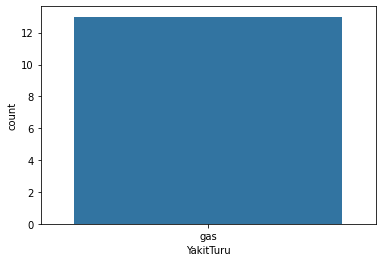

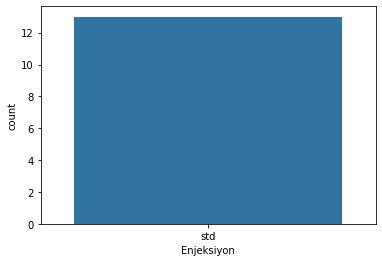

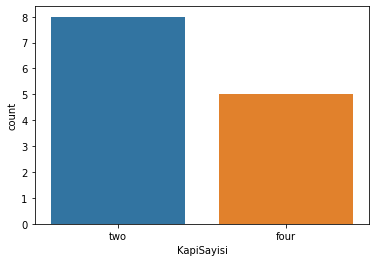

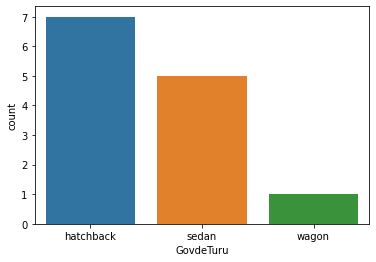

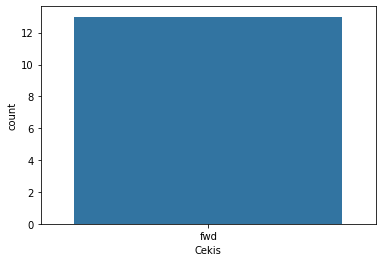

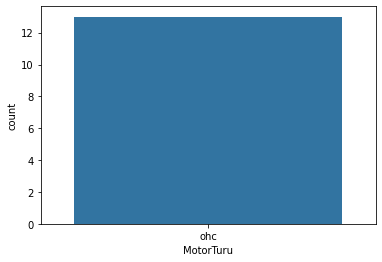

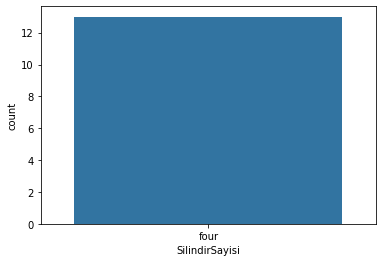

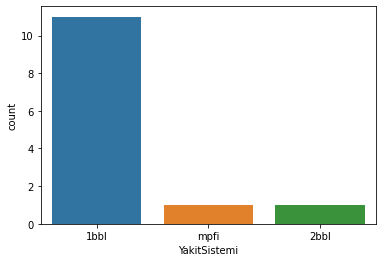

In [157]:
honda = objects[(objects["Uretici"]=="honda")]
cols = list(objects.columns)
del cols[0]
for i in cols:
    plt.figure(i)
    sns.countplot(honda[i])

In [137]:
#ilişki

In [138]:
cars_corr=cars.corr()
cars_corr

,SiraNo,RiskDerecesi,KayipDegeri,AzamiAgirlik,MotorHacmi,BeygirGucu,MaximumDevir,SehirIciHarcama,SehirDisiHarcama,Fiyat
SiraNo,1.000000,-0.155308,-0.254979,0.223099,0.115606,0.146344,-0.253977,-0.130918,-0.134774,0.043218
RiskDerecesi,-0.155308,1.000000,0.518344,-0.251880,-0.109453,-0.003949,0.199106,0.089550,0.149830,-0.162794
KayipDegeri,-0.254979,0.518344,1.000000,0.125858,0.207820,0.290511,0.237697,-0.235523,-0.188564,0.202761
AzamiAgirlik,0.223099,-0.251880,0.125858,1.000000,0.888626,0.790095,-0.259988,-0.762155,-0.789338,0.893639
MotorHacmi,0.115606,-0.109453,0.207820,0.888626,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
BeygirGucu,0.146344,-0.003949,0.290511,0.790095,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
MaximumDevir,-0.253977,0.199106,0.237697,-0.259988,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
SehirIciHarcama,-0.130918,0.089550,-0.235523,-0.762155,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
SehirDisiHarcama,-0.134774,0.149830,-0.188564,-0.789338,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
Fiyat,0.043218,-0.162794,0.202761,0.893639,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


In [139]:
col_corr = cars_corr.columns
cars_corr[(cars_corr[col_corr] > -1)]["Fiyat"]

SiraNo              0.043218
RiskDerecesi       -0.162794
KayipDegeri         0.202761
AzamiAgirlik        0.893639
MotorHacmi          0.841496
BeygirGucu          0.759874
MaximumDevir       -0.171916
SehirIciHarcama    -0.692273
SehirDisiHarcama   -0.720090
Fiyat               1.000000
Name: Fiyat, dtype: float64

<AxesSubplot:xlabel='AzamiAgirlik', ylabel='Fiyat'>

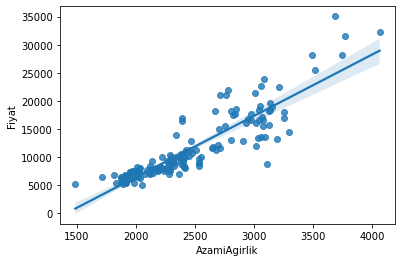

In [158]:
sns.regplot(cars["AzamiAgirlik"],cars["Fiyat"],data=cars)

Fiyat değişkenini ile AzamiAğırlık değişkeni arasında %89 pozitif yönde ilişkili olduğu gözlemlenmektedir. 

In [ ]:
#Artık veriler

In [159]:
cars.head()

,SiraNo,RiskDerecesi,KayipDegeri,Uretici,YakitTuru,Enjeksiyon,KapiSayisi,GovdeTuru,Cekis,DingilAcikligi,...,MotorHacmi,YakitSistemi,SilindirCapi,Zamanlama,SikistirmaOrani,BeygirGucu,MaximumDevir,SehirIciHarcama,SehirDisiHarcama,Fiyat
0,1,2,164,audi,gas,std,four,sedan,fwd,"99,8",...,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
1,2,2,164,audi,gas,std,four,sedan,4wd,"99,4",...,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
2,3,1,158,audi,gas,std,four,sedan,fwd,"105,8",...,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,17710
3,4,1,158,audi,gas,turbo,four,sedan,fwd,"105,8",...,131,mpfi,"3,13","3,4","8,3",140,5500,17,20,23875
4,5,2,192,bmw,gas,std,two,sedan,rwd,"101,2",...,108,mpfi,"3,5","2,8","8,8",101,5800,23,29,16430


In [160]:
numeric = cars.select_dtypes(exclude=["object"])
numeric.columns

Index(['SiraNo', 'RiskDerecesi', 'KayipDegeri', 'AzamiAgirlik', 'MotorHacmi',
       'BeygirGucu', 'MaximumDevir', 'SehirIciHarcama', 'SehirDisiHarcama',
       'Fiyat'],
      dtype='object')

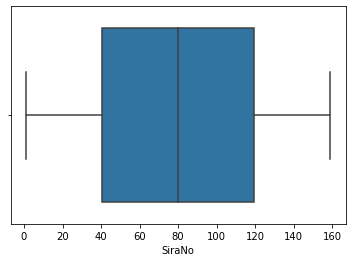

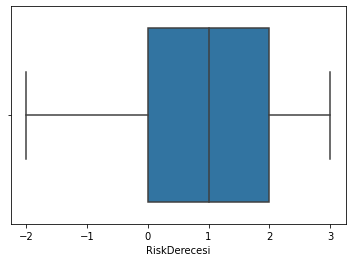

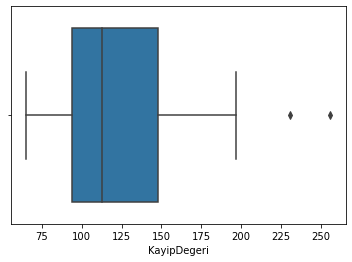

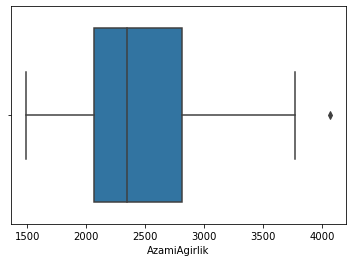

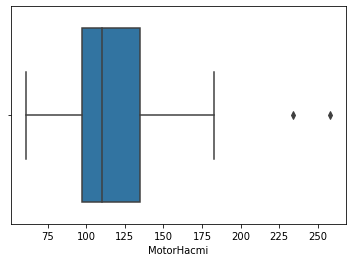

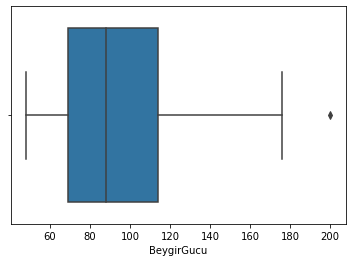

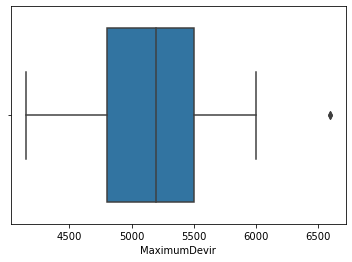

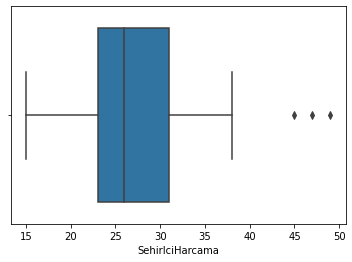

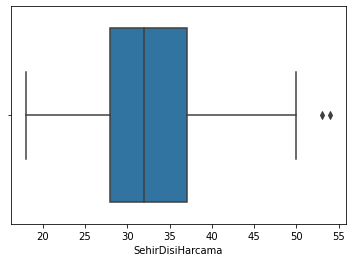

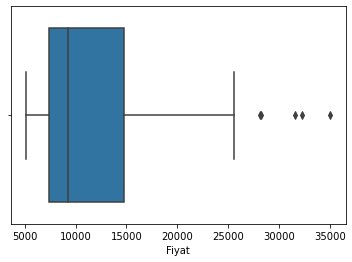

In [142]:
for i in numeric.columns:
    plt.figure(i)
    sns.boxplot(cars[i])

In [161]:
def aykırı(veri):
    Q1 = veri.quantile(0.25)
    Q3 = veri.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR

    alt_aykiri = (veri<(alt_sinir))
    ust_aykiri = (veri>(ust_sinir))
    tum_aykiri = (alt_aykiri | ust_aykiri)
    print("Toplam Gozlem Sayisi :",veri.shape[0])
    print("Alt sınır değeri :"+ "%2f" % (alt_sinir))
    print("Üst sınır değeri :"+ "%2f" % (ust_sinir))
    print("Toplam Aykırı Gözlem : " ,veri[alt_aykiri].shape[0]+veri[ust_aykiri].shape[0])
    print(veri[tum_aykiri])
    


In [176]:
for i in numeric.columns:
    print(aykırı(cars[i]),"-"*35,"\n")

Toplam Gozlem Sayisi : 159
Alt sınır değeri :-78.000000
Üst sınır değeri :238.000000
Toplam Aykırı Gözlem :  0
Series([], Name: SiraNo, dtype: int64)
None ----------------------------------- 

Toplam Gozlem Sayisi : 159
Alt sınır değeri :-3.000000
Üst sınır değeri :5.000000
Toplam Aykırı Gözlem :  0
Series([], Name: RiskDerecesi, dtype: int64)
None ----------------------------------- 

Toplam Gozlem Sayisi : 159
Alt sınır değeri :13.000000
Üst sınır değeri :229.000000
Toplam Aykırı Gözlem :  2
76     231
147    256
Name: KayipDegeri, dtype: int64
None ----------------------------------- 

Toplam Gozlem Sayisi : 159
Alt sınır değeri :949.500000
Üst sınır değeri :3925.500000
Toplam Aykırı Gözlem :  1
32    4066
Name: AzamiAgirlik, dtype: int64
None ----------------------------------- 

Toplam Gozlem Sayisi : 159
Alt sınır değeri :40.000000
Üst sınır değeri :192.000000
Toplam Aykırı Gözlem :  2
32    258
48    234
Name: MotorHacmi, dtype: int64
None ----------------------------------- 

T

In [178]:
#fiyat tahmini

0.8198172167883727


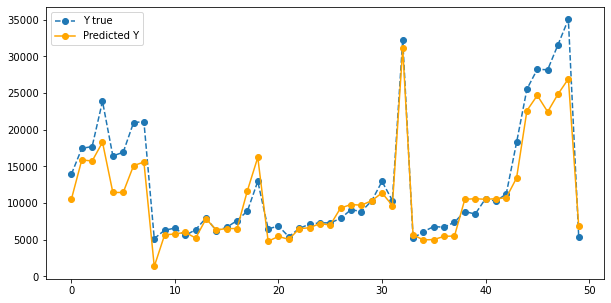

In [219]:
data = numeric.drop(numeric.iloc[:,:2],axis=1)
X = data.drop("Fiyat",axis=1)
y = data[["Fiyat"]]

model = LinearRegression().fit(X,y)

y_pred = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(y[:50],"o--",label="Y true")
plt.plot(y_pred[:50] ,"o-",label = "Predicted Y",color="orange")
plt.legend()

print(model.score(X,y))

In [229]:
from sklearn.metrics import r2_score,mean_squared_error
models = [LinearRegression,Ridge,ElasticNet]

def model(m):
    model = m().fit(X,y)
    y_pred = model.predict(X)
    print("model : ", m)
    print("r2 : ",r2_score(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("\n")

In [230]:
for i in models:
    model(i)

model :  <class 'sklearn.linear_model._base.LinearRegression'>
r2 :  0.8198172167883727
RMSE :  2487.170645997862


model :  <class 'sklearn.linear_model._ridge.Ridge'>
r2 :  0.8198171523126534
RMSE :  2487.1710909962667


model :  <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
r2 :  0.8196319712789915
RMSE :  2488.4488447945105


